## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import keras
import itertools
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    model = Sequential()
    model.add(Dense(units = input_shape[1] ,input_dim = input_shape[1], kernel_initializer = 'normal', activation = 'relu',name = 'input'))
    
    for i, n_units in enumerate(num_neurons):
        model.add(Dense(units=n_units, kernel_initializer='normal', activation='relu',name="hidden_layer"+str(i+1)))  
        model.add(BatchNormalization())         
    
    model.add(Dense(units=output_units,kernel_initializer='normal', activation='softmax',name='output'))

    return model
    """
    Build your own model
    """

In [6]:
def plot_model_score(results):
    
    NUM_COLORS = len(results.keys())
    cm = plt.get_cmap('gist_rainbow')
    color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
    
    plt.figure(figsize=(10,8))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label='train-'+cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label='valid-'+cond, color=color_bar[i])
    plt.title("Loss")
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


    plt.figure(figsize=(10,8))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label='train-'+cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label='valid-'+cond, color=color_bar[i])
    plt.title("Accuracy")
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [7]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [8]:
# 載入 Callbacks

"""
Set model checkpoint callbacks
"""
model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True)

In [12]:
results = {}

for option in [True,False]:
    model = build_mlp(input_shape=x_train.shape)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    if option :
        # 載入 Callbacks
        model_ckpt = ModelCheckpoint(filepath="D86HW.h5", 
                             monitor="val_loss", 
                             save_best_only=True)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[model_ckpt]
                  )
    else:
        odel_ckpt = ModelCheckpoint(filepath="D86HW.h5", 
                             monitor="val_loss", 
                             save_best_only=False)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[model_ckpt]
                  )
        
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    # Load back
    model = keras.models.load_model("D86HW.h5")
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    exp_name_tag = f'save_best_only is {str(option)}'
    
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc,
                             'loss_loadback': loss_loadback,
                             'acc_loadback': acc_loadback
                             }
"""
Write your training loop and show the results
"""

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
__________

Epoch 50/50
10000/10000 [==============================] - 9s 897us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
bat

'\nWrite your training loop and show the results\n'

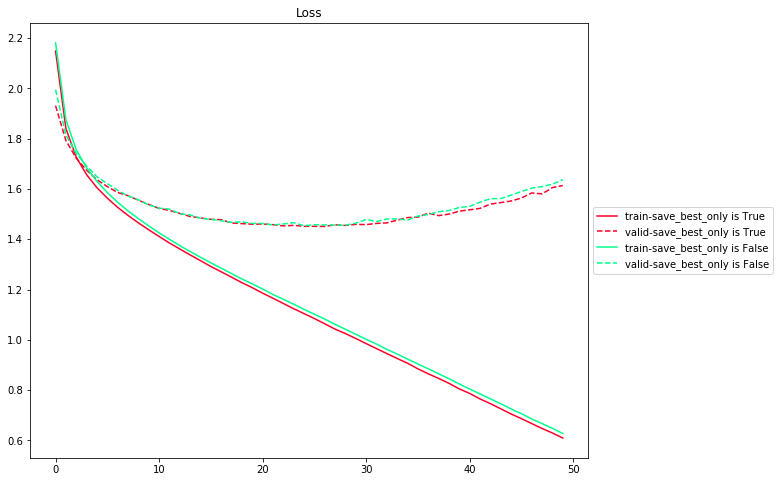

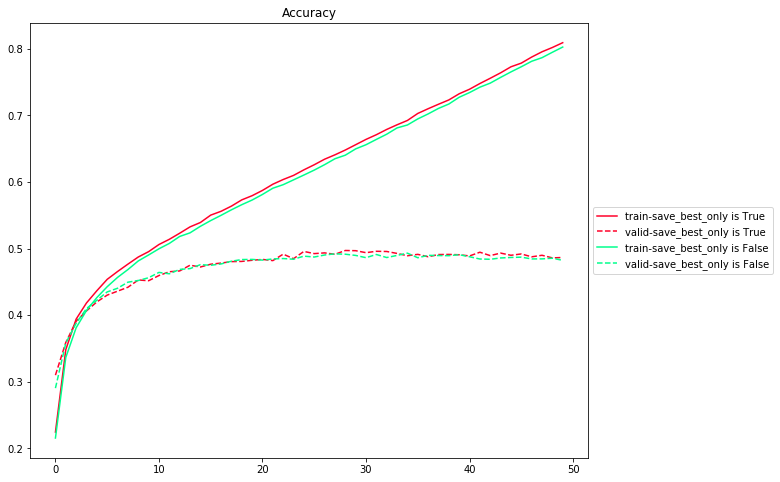

In [13]:
plot_model_score(results)

# 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [14]:
model = build_mlp(input_shape=x_train.shape)
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

# 載入 Callbacks
model_ckpt = ModelCheckpoint(filepath="D86HW.h5", 
                             monitor="val_loss", 
                             save_best_only=False,
                             save_weights_only=True
                            )
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
          )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
__________

Epoch 50/50
50000/50000 [==============================] - 66s 1ms/step - loss: 0.6145 - acc: 0.8099 - val_loss: 1.6340 - val_acc: 0.4897


In [9]:
#create a new model
modelA = model = build_mlp(input_shape=x_train.shape)

# Load back weight of model 
modelA.load_weights("D86HW.h5")

#compile new model with old weight
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
modelA.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

#predict with using new model 
ynew = modelA.predict_classes(x_test)

In [10]:
for i in range(len(x_test)):
    print(f"X= {x_test[i]} , Predicted = {ynew[i]}")

X= [0.61960784 0.43921569 0.19215686 ... 0.08235294 0.2627451  0.43137255] , Predicted = 3
X= [0.92156863 0.92156863 0.92156863 ... 0.72941176 0.78431373 0.78039216] , Predicted = 9
X= [0.61960784 0.74509804 0.87058824 ... 0.02745098 0.03137255 0.02745098] , Predicted = 0
X= [0.60784314 0.61176471 0.58431373 ... 0.28627451 0.26666667 0.19607843] , Predicted = 0
X= [0.25490196 0.26666667 0.19607843 ... 0.50196078 0.61176471 0.45882353] , Predicted = 4
X= [0.70196078 0.4627451  0.3254902  ... 0.59607843 0.34117647 0.28627451] , Predicted = 6
X= [0.62745098 0.14509804 0.05098039 ... 0.11372549 0.11764706 0.10980392] , Predicted = 9
X= [0.3254902  0.36862745 0.33333333 ... 0.28235294 0.14901961 0.08627451] , Predicted = 6
X= [0.09019608 0.0745098  0.09019608 ... 0.58823529 0.51764706 0.4627451 ] , Predicted = 5
X= [0.85098039 0.84313725 0.81960784 ... 0.72941176 0.7254902  0.8745098 ] , Predicted = 1
X= [0.35294118 0.48627451 0.58431373 ... 0.34901961 0.47058824 0.57254902] , Predicted = 0

X= [0.92941176 0.89019608 0.93333333 ... 0.86666667 0.85882353 0.89411765] , Predicted = 2
X= [0.49803922 0.58823529 0.75294118 ... 0.40784314 0.39607843 0.36078431] , Predicted = 2
X= [0.43921569 0.49019608 0.50980392 ... 0.61568627 0.55686275 0.10980392] , Predicted = 7
X= [0.89411765 0.91372549 0.90980392 ... 0.71764706 0.69019608 0.75686275] , Predicted = 7
X= [0.07058824 0.06666667 0.10980392 ... 0.05490196 0.05098039 0.0745098 ] , Predicted = 3
X= [0.61960784 0.64313725 0.54509804 ... 0.50980392 0.50588235 0.52941176] , Predicted = 9
X= [0.85490196 0.95294118 0.97254902 ... 0.40392157 0.44313725 0.43921569] , Predicted = 9
X= [0.69803922 0.75294118 0.85882353 ... 0.33333333 0.34509804 0.01176471] , Predicted = 7
X= [0.34901961 0.49019608 0.09803922 ... 0.29019608 0.25882353 0.13333333] , Predicted = 6
X= [0.44705882 0.54117647 0.55686275 ... 0.36078431 0.36078431 0.30980392] , Predicted = 0
X= [0.24705882 0.23137255 0.25098039 ... 0.43921569 0.33333333 0.29411765] , Predicted = 3

X= [0.43921569 0.55294118 0.6745098  ... 0.24705882 0.29803922 0.0745098 ] , Predicted = 9
X= [0.48627451 0.40784314 0.30196078 ... 0.59607843 0.50980392 0.38823529] , Predicted = 3
X= [0.78039216 0.75686275 0.71372549 ... 0.45882353 0.40784314 0.33333333] , Predicted = 9
X= [0.07058824 0.01960784 0.05098039 ... 0.51764706 0.43137255 0.45882353] , Predicted = 1
X= [0.40392157 0.49411765 0.68627451 ... 0.37647059 0.38039216 0.39607843] , Predicted = 0
X= [0.19215686 0.20392157 0.2        ... 0.72156863 0.64705882 0.58039216] , Predicted = 1
X= [0.85098039 0.86666667 0.87058824 ... 0.82352941 0.83137255 0.84313725] , Predicted = 5
X= [0.22352941 0.2745098  0.45098039 ... 0.36470588 0.33333333 0.2627451 ] , Predicted = 2
X= [0.46666667 0.65490196 0.4627451  ... 0.1372549  0.34901961 0.24313725] , Predicted = 2
X= [0.58823529 0.66666667 0.76470588 ... 0.36470588 0.48235294 0.59215686] , Predicted = 8
X= [0.3254902  0.50196078 0.3254902  ... 0.14117647 0.16078431 0.13333333] , Predicted = 8

X= [0.56862745 0.49803922 0.4627451  ... 0.96862745 0.89019608 0.8627451 ] , Predicted = 7
X= [0.15294118 0.40784314 0.62745098 ... 0.3372549  0.30588235 0.17647059] , Predicted = 3
X= [0.99607843 1.         1.         ... 1.         1.         1.        ] , Predicted = 6
X= [1.         1.         1.         ... 0.99215686 0.99215686 0.99215686] , Predicted = 9
X= [0.95294118 0.95294118 0.94117647 ... 0.70588235 0.72156863 0.72156863] , Predicted = 6
X= [0.17254902 0.23137255 0.11372549 ... 0.06666667 0.07058824 0.05490196] , Predicted = 2
X= [0.81960784 0.90588235 1.         ... 0.41568627 0.45882353 0.25490196] , Predicted = 7
X= [0.28235294 0.3372549  0.20784314 ... 0.38039216 0.43529412 0.34117647] , Predicted = 2
X= [0.18431373 0.22745098 0.20392157 ... 0.39607843 0.61176471 0.35294118] , Predicted = 4
X= [0.47843137 0.49803922 0.54901961 ... 0.32941176 0.37254902 0.43921569] , Predicted = 1
X= [0.89411765 0.96470588 0.98039216 ... 0.58823529 0.57647059 0.56862745] , Predicted = 9

X= [0.85882353 0.84313725 0.68627451 ... 0.76470588 0.78039216 0.6627451 ] , Predicted = 3
X= [0.78431373 0.55294118 0.69019608 ... 0.30196078 0.42745098 0.14509804] , Predicted = 5
X= [0.85098039 0.82352941 0.80784314 ... 0.78039216 0.70588235 0.61568627] , Predicted = 6
X= [0.47058824 0.55294118 0.51764706 ... 0.68627451 0.68627451 0.68235294] , Predicted = 4
X= [0.60392157 0.61568627 0.54117647 ... 0.41568627 0.4        0.34117647] , Predicted = 7
X= [0.40784314 0.63137255 0.86666667 ... 0.56862745 0.52156863 0.5254902 ] , Predicted = 9
X= [0.24705882 0.13333333 0.12156863 ... 0.20392157 0.09411765 0.08235294] , Predicted = 9
X= [0.27843137 0.28627451 0.2745098  ... 0.48627451 0.5254902  0.56470588] , Predicted = 3
X= [0.83921569 0.94901961 1.         ... 0.63921569 0.61568627 0.4745098 ] , Predicted = 0
X= [1.         1.         1.         ... 0.25882353 0.19607843 0.14117647] , Predicted = 9
X= [0.45098039 0.5372549  0.38039216 ... 0.43921569 0.54509804 0.32941176] , Predicted = 2

X= [0.55294118 0.44705882 0.43137255 ... 0.41960784 0.33333333 0.31372549] , Predicted = 5
X= [0.97647059 0.97647059 0.97647059 ... 0.97254902 0.97254902 0.97254902] , Predicted = 2
X= [0.47843137 0.36078431 0.24313725 ... 0.68627451 0.65882353 0.59215686] , Predicted = 3
X= [0.45490196 0.50980392 0.38431373 ... 0.70588235 0.77254902 0.41176471] , Predicted = 6
X= [0.62352941 0.01960784 0.09019608 ... 0.48235294 0.48235294 0.52941176] , Predicted = 5
X= [0.14509804 0.1254902  0.10980392 ... 0.40784314 0.33333333 0.31764706] , Predicted = 3
X= [0.70980392 0.77647059 0.85882353 ... 0.98823529 0.98823529 0.98823529] , Predicted = 6
X= [0.34117647 0.22352941 0.12941176 ... 0.34901961 0.24705882 0.15686275] , Predicted = 9
X= [0.80784314 0.82352941 0.81568627 ... 0.47058824 0.46666667 0.46666667] , Predicted = 1
X= [0.70980392 0.69411765 0.65098039 ... 0.94509804 0.63921569 0.63137255] , Predicted = 3
X= [0.25490196 0.35294118 0.29411765 ... 0.58039216 0.57647059 0.55294118] , Predicted = 4

X= [1. 1. 1. ... 1. 1. 1.] , Predicted = 3
X= [0.34117647 0.34901961 0.3372549  ... 0.31372549 0.31764706 0.29411765] , Predicted = 5
X= [0.38823529 0.40392157 0.41568627 ... 0.40784314 0.41568627 0.44313725] , Predicted = 6
X= [0.67058824 0.75686275 0.75686275 ... 0.36078431 0.4        0.24313725] , Predicted = 7
X= [0.59215686 0.56470588 0.56862745 ... 0.23137255 0.2        0.18823529] , Predicted = 6
X= [0.40392157 0.40392157 0.41176471 ... 0.40392157 0.40392157 0.41176471] , Predicted = 4
X= [0.3254902  0.18823529 0.19607843 ... 0.71764706 0.58431373 0.25490196] , Predicted = 4
X= [0.60392157 0.67843137 0.70196078 ... 0.         0.01960784 0.02745098] , Predicted = 1
X= [1.         1.         1.         ... 0.99215686 0.99215686 0.99215686] , Predicted = 9
X= [0.27843137 0.32941176 0.27058824 ... 0.56078431 0.09019608 0.10588235] , Predicted = 8
X= [0.84313725 0.8745098  0.8627451  ... 0.45882353 0.50588235 0.43529412] , Predicted = 2
X= [0.26666667 0.28235294 0.10196078 ... 0.5215

X= [0.03137255 0.03137255 0.03137255 ... 0.82745098 0.82745098 0.82745098] , Predicted = 3
X= [0.15686275 0.30980392 0.24705882 ... 0.18039216 0.3372549  0.28235294] , Predicted = 5
X= [0.78039216 0.83921569 0.9254902  ... 0.46666667 0.42745098 0.37647059] , Predicted = 9
X= [0.10588235 0.10980392 0.10980392 ... 0.12941176 0.1372549  0.12941176] , Predicted = 4
X= [0.45490196 0.50588235 0.52941176 ... 0.63137255 0.55686275 0.45098039] , Predicted = 7
X= [0.41960784 0.40392157 0.38823529 ... 0.35686275 0.37647059 0.43137255] , Predicted = 1
X= [0.26666667 0.28627451 0.30980392 ... 0.87058824 0.84313725 0.8       ] , Predicted = 7
X= [0.4745098  0.60392157 0.29411765 ... 0.45882353 0.58039216 0.32156863] , Predicted = 2
X= [0.40784314 0.4627451  0.62745098 ... 0.4        0.45882353 0.61568627] , Predicted = 0
X= [0.97647059 0.99607843 1.         ... 0.05098039 0.15686275 0.21176471] , Predicted = 9
X= [1.         1.         1.         ... 0.99607843 0.99607843 0.99607843] , Predicted = 1

X= [0.34117647 0.36862745 0.30196078 ... 0.89411765 0.92941176 0.93333333] , Predicted = 3
X= [0.03921569 0.03137255 0.03529412 ... 0.67058824 0.78823529 0.87843137] , Predicted = 3
X= [0.41176471 0.45098039 0.47843137 ... 0.36862745 0.31764706 0.28235294] , Predicted = 1
X= [0.58823529 0.43921569 0.41176471 ... 0.52941176 0.43921569 0.41960784] , Predicted = 6
X= [0.43137255 0.41568627 0.2627451  ... 1.         1.         1.        ] , Predicted = 7
X= [0.83137255 0.65098039 0.42352941 ... 0.19607843 0.20392157 0.23529412] , Predicted = 9
X= [0.88627451 0.94117647 0.96078431 ... 0.88235294 0.87058824 0.85490196] , Predicted = 0
X= [0.89019608 0.90980392 0.93333333 ... 0.9372549  0.9372549  0.9372549 ] , Predicted = 7
X= [0.54117647 0.57647059 0.61176471 ... 0.56078431 0.56078431 0.56862745] , Predicted = 2
X= [0.80784314 0.82352941 0.81960784 ... 0.8745098  0.85882353 0.85490196] , Predicted = 1
X= [0.14901961 0.12941176 0.11372549 ... 0.03529412 0.02745098 0.03921569] , Predicted = 3

X= [0.40784314 0.30980392 0.21568627 ... 0.75294118 0.49019608 0.30980392] , Predicted = 9
X= [0.79215686 0.82352941 0.91372549 ... 0.43921569 0.49019608 0.21960784] , Predicted = 0
X= [0.38039216 0.31372549 0.21176471 ... 0.49411765 0.42745098 0.36470588] , Predicted = 2
X= [0.69411765 0.70588235 0.67058824 ... 0.25098039 0.35294118 0.41176471] , Predicted = 8
X= [0.27058824 0.30588235 0.18431373 ... 0.56470588 0.49803922 0.38039216] , Predicted = 4
X= [0.67058824 0.70196078 0.6627451  ... 0.62745098 0.6627451  0.74117647] , Predicted = 1
X= [0.10980392 0.11372549 0.09411765 ... 0.43137255 0.42745098 0.44705882] , Predicted = 1
X= [1. 1. 1. ... 1. 1. 1.] , Predicted = 5
X= [0.58823529 0.62352941 0.54509804 ... 0.80392157 0.69411765 0.49019608] , Predicted = 2
X= [0.20392157 0.35686275 0.09803922 ... 0.1254902  0.11764706 0.14117647] , Predicted = 2
X= [0.27843137 0.33333333 0.08235294 ... 0.35294118 0.25490196 0.16862745] , Predicted = 6
X= [0.56862745 0.56862745 0.41960784 ... 0.5372

X= [0.89019608 0.88235294 0.69019608 ... 0.18431373 0.25098039 0.18431373] , Predicted = 7
X= [0.59607843 0.51764706 0.5254902  ... 0.83921569 0.75686275 0.77254902] , Predicted = 1
X= [0.50980392 0.56470588 0.7254902  ... 0.35686275 0.4        0.44705882] , Predicted = 9
X= [0.38431373 0.63137255 0.82352941 ... 0.09411765 0.40392157 0.47843137] , Predicted = 0
X= [0.43137255 0.42352941 0.37647059 ... 0.2627451  0.26666667 0.24313725] , Predicted = 1
X= [0.32156863 0.43529412 0.39215686 ... 0.19215686 0.22352941 0.23137255] , Predicted = 1
X= [0.44313725 0.50980392 0.34509804 ... 0.45098039 0.51372549 0.36078431] , Predicted = 3
X= [0.49019608 0.61568627 0.74509804 ... 0.61960784 0.64313725 0.65490196] , Predicted = 8
X= [0.19607843 0.19215686 0.19607843 ... 0.71764706 0.77254902 0.5254902 ] , Predicted = 4
X= [0.84705882 0.86666667 0.87843137 ... 0.38431373 0.34117647 0.32941176] , Predicted = 9
X= [0.14117647 0.10588235 0.09019608 ... 0.77647059 0.78431373 0.76078431] , Predicted = 3

X= [0.39607843 0.50588235 0.6627451  ... 0.09411765 0.11764706 0.17647059] , Predicted = 2
X= [0.30196078 0.25882353 0.25882353 ... 0.2745098  0.32156863 0.38431373] , Predicted = 8
X= [0.58039216 0.64313725 0.50196078 ... 0.56078431 0.65098039 0.40784314] , Predicted = 4
X= [0.18823529 0.67058824 0.89019608 ... 0.78431373 0.71764706 0.69411765] , Predicted = 9
X= [0.61568627 0.65490196 0.6627451  ... 0.32156863 0.3254902  0.20392157] , Predicted = 9
X= [0.83921569 0.32941176 0.25882353 ... 0.63137255 0.25490196 0.14509804] , Predicted = 6
X= [0.68627451 0.75294118 0.83921569 ... 0.44313725 0.5372549  0.47843137] , Predicted = 7
X= [0.42745098 0.47843137 0.21176471 ... 0.34901961 0.35294118 0.25882353] , Predicted = 2
X= [0.43921569 0.43529412 0.42745098 ... 0.25490196 0.25490196 0.24705882] , Predicted = 9
X= [0.51764706 0.49019608 0.35686275 ... 0.48235294 0.44313725 0.39607843] , Predicted = 1
X= [0.22745098 0.25490196 0.28235294 ... 0.63921569 0.52941176 0.43529412] , Predicted = 7